In [ ]:
# finding single and double-positive cells

In [2]:
library(Seurat)
library(dplyr)
library(ggplot2)
library(ggpointdensity)
library(cowplot)
library(viridis)
library(ggbeeswarm)
library(anndata)

In [3]:
ad = read_h5ad('GSE200202_forebrain_atlas.h5ad')
ad

AnnData object with n_obs × n_vars = 102519 × 3051
    obs: 'sampleID', 'tissue', 'gate', 'timepoint', 'postnatal_day', 'set', 'treatment', 'condition', 'Estimated Number of Cells', 'Mean Reads per Cell', 'Median Genes per Cell', 'Number of Reads', 'Valid Barcodes', 'Sequencing Saturation', 'Q30 Bases in Barcode', 'Q30 Bases in RNA Read', 'Q30 Bases in Sample Index', 'Q30 Bases in UMI', 'Reads Mapped to Genome', 'Reads Mapped Confidently to Genome', 'Reads Mapped Confidently to Intergenic Regions', 'Reads Mapped Confidently to Intronic Regions', 'Reads Mapped Confidently to Exonic Regions', 'Reads Mapped Confidently to Transcriptome', 'Reads Mapped Antisense to Gene', 'Fraction Reads in Cells', 'Total Genes Detected', 'Median UMI Counts per Cell', 'scrublet_score', 'scrublet_cluster_score', 'bh_pval', 'is_doublet', 'n_genes', 'percent_mito', 'n_counts', 'leiden_0_05', 'annot_leiden_0_05', 'leiden_0_1', 'annot_leiden_0_1', 'leiden_0_2', 'annot_leiden_0_2', 'leiden_0_3', 'annot_leiden_0_

In [4]:
exp_mat = t(ad$X)

In [5]:
mtd = ad$obs
head(mtd)

sampleID tissue    gate     timepoint postnatal_day
AAACCCACAGACCTGC-HAM12604 HAM12604 forebrain SOX2_+ve E12.5     -9.5         
AAACCCATCACTGATG-HAM12604 HAM12604 forebrain SOX2_+ve E12.5     -9.5         
AAACCCATCAGGGTAG-HAM12604 HAM12604 forebrain SOX2_+ve E12.5     -9.5         
AAACCCATCGGTTCAA-HAM12604 HAM12604 forebrain SOX2_+ve E12.5     -9.5         
AAACGAAAGACGAAGA-HAM12604 HAM12604 forebrain SOX2_+ve E12.5     -9.5         
AAACGAAAGCCTGACC-HAM12604 HAM12604 forebrain SOX2_+ve E12.5     -9.5         
                          set  treatment condition Estimated Number of Cells
AAACCCACAGACCTGC-HAM12604 set1 FALSE     normal    7932                     
AAACCCATCACTGATG-HAM12604 set1 FALSE     normal    7932                     
AAACCCATCAGGGTAG-HAM12604 set1 FALSE     normal    7932                     
AAACCCATCGGTTCAA-HAM12604 set1 FALSE     normal    7932                     
AAACGAAAGACGAAGA-HAM12604 set1 FALSE     normal    7932                     
AAACGAAAGCCTGACC-HAM12604 set1 FALSE     normal    7932                     
                          Mean Reads per Cell ⋯ UMAP_dim2_neuronal_glial
AAACCCACAGACCTGC-HAM12604 56918               ⋯  -4.5304861             
AAACCCATCACTGATG-HAM12604 56918               ⋯ -12.8314285             
AAACCCATCAGGGTAG-HAM12604 56918               ⋯  -0.7522154             
AAACCCATCGGTTCAA-HAM12604 56918               ⋯  -3.6976187             
AAACGAAAGACGAAGA-HAM12604 56918               ⋯  -8.1364183             
AAACGAAAGCCTGACC-HAM12604 56918               ⋯ -13.2707272             
                          annot_leiden_OPCs UMAP_dim1_OPCs UMAP_dim2_OPCs
AAACCCACAGACCTGC-HAM12604 nan               NaN            NaN           
AAACCCATCACTGATG-HAM12604 nan               NaN            NaN           
AAACCCATCAGGGTAG-HAM12604 nan               NaN            NaN           
AAACCCATCGGTTCAA-HAM12604 nan               NaN            NaN           
AAACGAAAGACGAAGA-HAM12604 nan               NaN            NaN           
AAACGAAAGCCTGACC-HAM12604 nan               NaN            NaN           
                          annot_leiden_embryonic_RG UMAP_dim1_embryonic_RG
AAACCCACAGACCTGC-HAM12604 Subthalamic nucleus       -1.5512671            
AAACCCATCACTGATG-HAM12604 nan                              NaN            
AAACCCATCAGGGTAG-HAM12604 nan                              NaN            
AAACCCATCGGTTCAA-HAM12604 Ganglionic eminence       -0.9627382            
AAACGAAAGACGAAGA-HAM12604 Epithalamus               -8.1567841            
AAACGAAAGCCTGACC-HAM12604 nan                              NaN            
                          UMAP_dim2_embryonic_RG annot_leiden_NBs UMAP_dim1_NBs
AAACCCACAGACCTGC-HAM12604  1.4751025             nan                    NaN    
AAACCCATCACTGATG-HAM12604        NaN             EmDienNBs        -5.102820    
AAACCCATCAGGGTAG-HAM12604        NaN             nan                    NaN    
AAACCCATCGGTTCAA-HAM12604 -5.1794343             nan                    NaN    
AAACGAAAGACGAAGA-HAM12604 -0.1218247             EmDienNBs        -6.576615    
AAACGAAAGCCTGACC-HAM12604        NaN             EmSthNBs         -9.491167    
                          UMAP_dim2_NBs
AAACCCACAGACCTGC-HAM12604        NaN   
AAACCCATCACTGATG-HAM12604 -12.277917   
AAACCCATCAGGGTAG-HAM12604        NaN   
AAACCCATCGGTTCAA-HAM12604        NaN   
AAACGAAAGACGAAGA-HAM12604 -10.066922   
AAACGAAAGCCTGACC-HAM12604  -4.113999

In [7]:
table(mtd$timepoint)
keepids = which(mtd$timepoint %in% c('E12.5', 'E14.5', 'E16.5', 'P0', 'P2', 'P7', 'P13', 'P19', 'P39'))


E12.5 E14.5 E16.5    P0    P2    P7   P13   P19   P39  P111  P365 
10948  8690  8608  9645 10350 13982  3025  8343 12216  8790  7922 

In [8]:
# cpm-normalize the raw counts
seu = CreateSeuratObject(counts = exp_mat[,keepids], meta.data = mtd[keepids,])
seu <- NormalizeData(seu, normalization.method = "RC", scale.factor = 1e6)
exp1 = LayerData(seu, assay = 'RNA', layer = 'data') # cpm

Warning message:
“Data is of class matrix. Coercing to dgCMatrix.”
Normalizing layer: counts



In [9]:
table(seu$prediction_Class)
table(seu$annot_leiden_neuronal_glial)


    Astrocytes      Ependymal         Immune        Neurons         Oligos 
         12345           2826          15330          45348           8290 
PeripheralGlia       Vascular 
            76           1592 


             Early EmNBs [1]              Early EmNBs [2] 
                        3135                         2086 
                Embryonic RG              Ependymal cells 
                        5265                         2064 
               GABAergic INs                   GE NBs [1] 
                         927                         7108 
                  GE NBs [2]  Gliogenic precursors (APCs) 
                        3713                         4647 
Gliogenic precursors (aNSCs)          Hippocampal NBs [1] 
                        3902                         3072 
         Hippocampal NBs [2]                  ImStNeurons 
                        7298                         2974 
          Juvenile RG & TAPs                         OPCs 
                        6492                         4558 
        Oligodendrocytes [1]         Oligodendrocytes [2] 
                         937                         2825 
                   PreM-ODCs      Quiescent NSCs (dorsa

In [10]:
sum(exp1['Neurog2',]>0)
sum(exp1['Ascl1',]>0)
sum(exp1['Neurog1',]>0)

[1] 42870

[1] 42130

[1] 47981

In [11]:
# get new cell types for A1N2 and N1N2 cases
get_celltype_new <- function(exp0, g1, g2){
    gene1_exp = exp0[g1,]
    gene2_exp = exp0[g2,]
    
    vec1 = rank(gene1_exp)
    vec2 = rank(gene2_exp)
    
    vec1 <- vec1/max(vec1, na.rm = T)
    vec2 <- vec2/max(vec2, na.rm = T)

    id1 = which(vec1>0.7 & vec2>0.7) # dbl-positive
    id2 = which(vec1>0.7 & vec2<=0.7) # neurog2
    id3 = which(vec1<=0.7 & vec2>0.7) # ascl1

    ctypes = rep('none', dim(exp0)[2])
    ctypes[id1] = 'double_positive'
    ctypes[id2] = paste0(g1, '_positive')
    ctypes[id3] = paste0(g2, '_positive')

    return(ctypes)
}

In [12]:
# get cell type labels based on ranked exp bins
seu$celltype_A1N2 = get_celltype_new(exp1, 'Neurog2', 'Ascl1')
seu$celltype_N1N2 = get_celltype_new(exp1, 'Neurog2', 'Neurog1')

In [13]:
# save file
saveids = which(exp1['Neurog2',]>0 | exp1['Ascl1',]>0 | exp1['Neurog1',]>0)
length(saveids)

sce = CreateSeuratObject(counts = LayerData(seu, assay = 'RNA', layer = 'counts')[,saveids], 
                         data = exp1[,saveids], meta.data = seu@meta.data[saveids,])
sce

# save
saveRDS(sce, file = 'Hamed_A1N1N2.rds')

[1] 53701

An object of class Seurat 
3051 features across 53701 samples within 1 assay 
Active assay: RNA (3051 features, 0 variable features)
 2 layers present: counts, data

In [14]:
dim(exp1)

[1]  3051 85807

In [30]:
gene1_exp = exp1['Neurog2',]
gene2_exp = exp1['Neurog1',]

vec1 = rank(gene1_exp)
vec2 = rank(gene2_exp)

vec1 <- vec1/max(vec1, na.rm = T)
vec2 <- vec2/max(vec2, na.rm = T)

In [27]:
cor(vec1, vec2, method = 'spearman')

[1] 0.1315921

In [28]:
dat = data.frame(m1_exp = log2(1+gene1_exp), m2_exp = log2(1+gene2_exp),
                 m1_rank = vec1, m2_rank = vec2)
dat[1:2,]

m1_exp m2_exp   m1_rank   m2_rank  
P12_NxCLB1_AAACCCAAGGTTCAGG 0      7.979469 0.4777732 0.7609341
P12_NxCLB1_AAACCCACAACTCGAT 0      7.845099 0.4777732 0.7461846

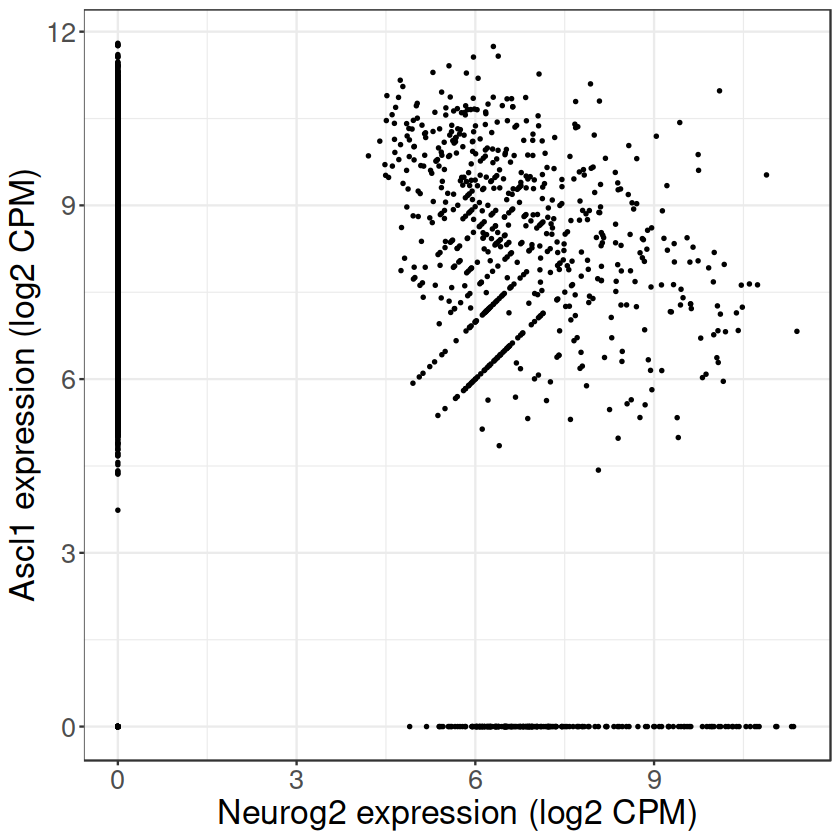

In [29]:
# png('aa-gene-exp-coexp.png', width = 5, height = 5, res = 300, units = 'in')
ggplot(dat, aes(x = m1_exp, y = m2_exp)) +
geom_point(size = 0.5) + theme_bw() + theme(text = element_text(size = 20)) +
xlab('Neurog2 expression (log2 CPM)') + ylab('Ascl1 expression (log2 CPM)')
# dev.off()

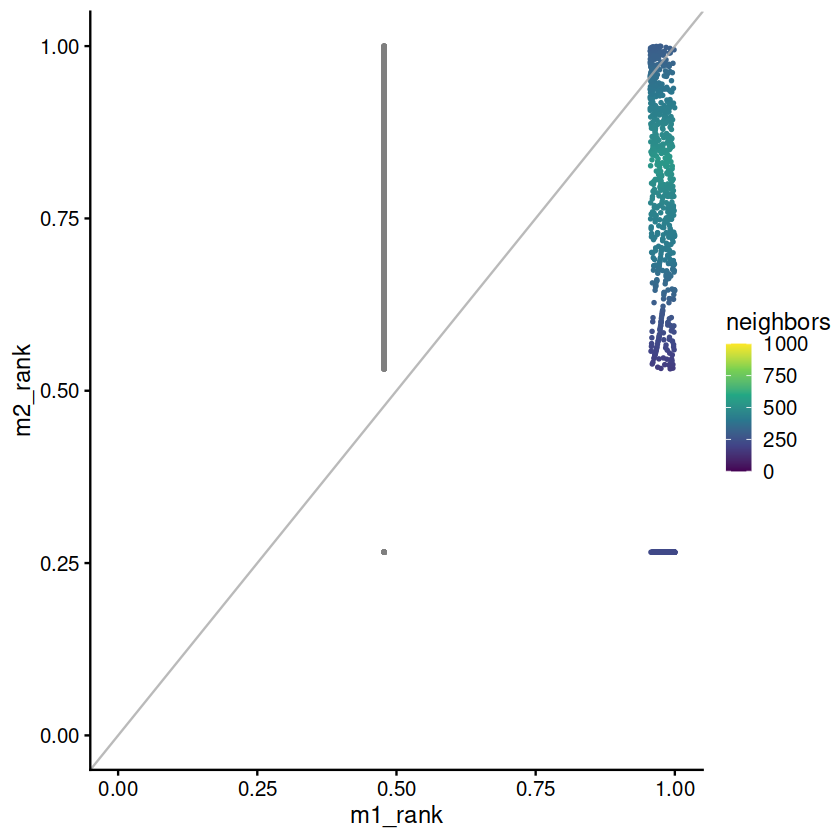

In [93]:
# png(paste0('aa-', g1, '-density-coexp.png'), width = 10, height = 5, res = 300, units = 'in')
# pdf(paste0('aa-hc-', g3, '-density-coexp.pdf'), width = 5, height = 5)

ggplot(dat, aes(x = m1_rank, y = m2_rank)) +
geom_pointdensity(size = 0.5) + scale_color_viridis_c(limits = c(0,1000)) + 
geom_abline(intercept = 0, slope = 1,col = 'darkgray', lwd = 0.5, alpha = 0.8)+
theme_cowplot() + labs(col = 'neighbors') + xlim(0,1) + ylim(0,1)

# dev.off()

In [31]:
id1 = which(vec1>0.7 & vec2>0.7) # dbl-positive
id2 = which(vec1>0.7 & vec2<0.7) # neurog2
id3 = which(vec1<0.7 & vec2>0.7) # ascl1

length(id1)
length(id2)
length(id3)

[1] 21742

[1] 4001

[1] 4001

In [32]:
# cluster 8,10,16,22 for dbl-pos; cluster 32 for neurog2+
table(as.character(seu$annot_leiden_neuronal_glial[id1]))


             Early EmNBs [1]              Early EmNBs [2] 
                        1480                          896 
                Embryonic RG              Ependymal cells 
                        2330                            7 
               GABAergic INs                   GE NBs [1] 
                         707                          252 
                  GE NBs [2] Gliogenic precursors (aNSCs) 
                        1231                          551 
 Gliogenic precursors (APCs)          Hippocampal NBs [1] 
                         486                         1339 
         Hippocampal NBs [2]                  ImStNeurons 
                        2905                          542 
          Juvenile RG & TAPs                          nan 
                        3734                         2873 
        Oligodendrocytes [1]         Oligodendrocytes [2] 
                         406                          619 
                        OPCs                    PreM-OD

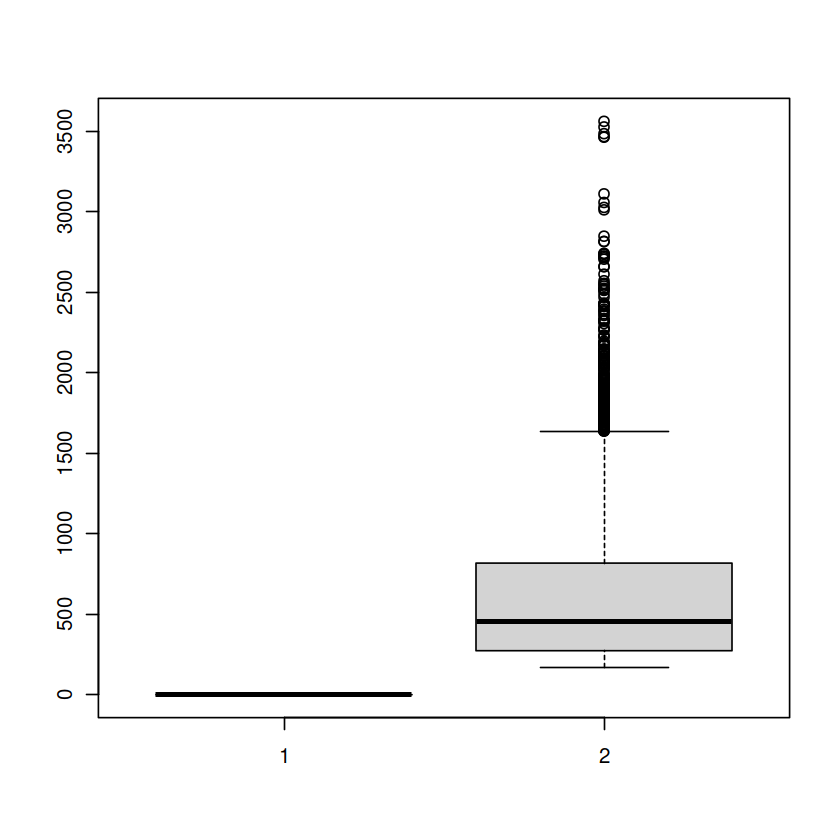

In [96]:
boxplot(exp1['Neurog2', id3], exp1['Ascl1', id3])

In [97]:
# Alex's target genes
alex = c('Bcl11a', 'Bcl11b', 'Nhlh1', 'Nhlh2', 'Sox2', 'Sox9', 'Gfap',
        'Pax6', 'Prom1', 'Foxj1', 'Rbfox3', 'Nes', 'Hopx', 'Dcx',
        'Bdnf', 'Pdgfra', 'S100b')
length(alex)

[1] 17

[1] "Hes1"

[1] 55969

[1] 14511

[1] 4663

[1] 5949

Warning message in data.frame(gene = currgene, ctype = c(rep("double+", length(id1)), :
“NaNs produced”
Warning message in data.frame(gene = currgene, ctype = c(rep("double+", length(id1)), :
“NaNs produced”
Warning message in data.frame(gene = currgene, ctype = c(rep("double+", length(id1)), :
“NaNs produced”
Warning message:
“Removed 8837 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 8837 rows containing missing values or values outside the scale range
(`position_quasirandom()`).”


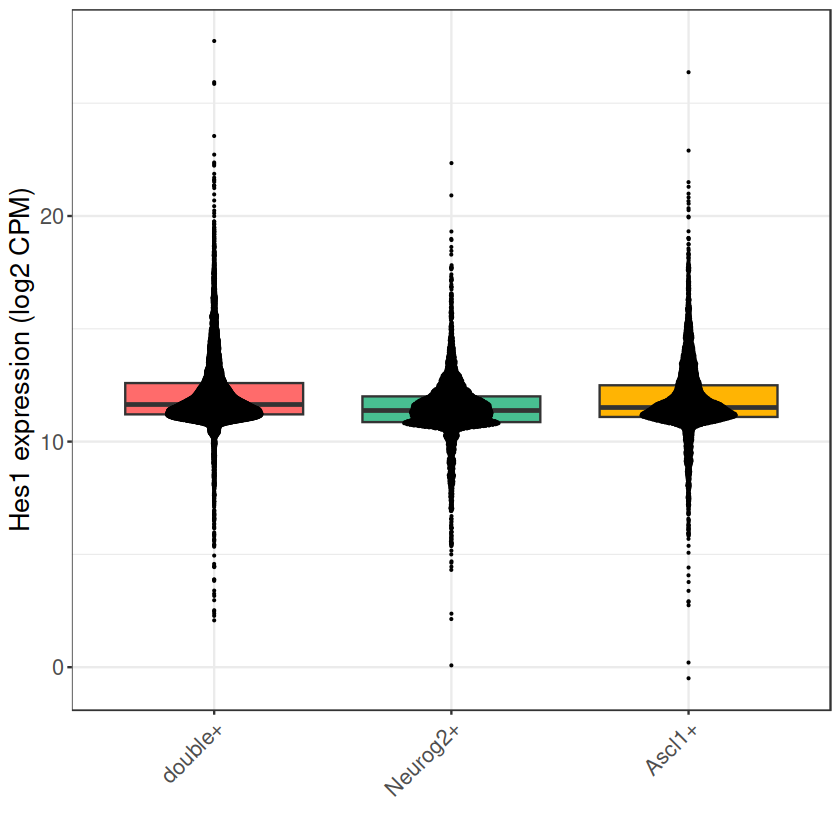

In [23]:
# other coexpressing genes
currgene = 'Hes1'
currgene
sum(exp1[currgene,]>0)

# no. of cells with >0 exp in each case
sum(exp1[currgene, id1]>0)
sum(exp1[currgene, id2]>0)
sum(exp1[currgene, id3]>0)

exp_vec = exp1[currgene,]
vec3 = rank(exp_vec)
vec3 <- vec3/max(vec3, na.rm = T)
plotdf = data.frame(gene = currgene, 
                    ctype = c(rep('double+', length(id1)), rep('Neurog2+', length(id2)), rep('Ascl1+', length(id3))),
                    exp = c(log2(1+exp_vec[id1]), log2(1+exp_vec[id2]), log2(1+exp_vec[id3])),
                    rank_exp = c(vec3[id1], vec3[id2], vec3[id3]))
plotdf$ctype = factor(plotdf$ctype, levels = c('double+', 'Neurog2+', 'Ascl1+'))

# png(paste0('aa-', currgene, '-exp.png'), width = 3.5, height = 5, res = 300, units = 'in')
ggplot(plotdf, aes(x = ctype, y = exp, fill = ctype)) + 
geom_boxplot(outlier.shape = NA) + geom_quasirandom(size = 0.1, width = 0.2) + theme_bw() +
theme(text = element_text(size = 16), axis.text.x = element_text(angle = 45, hjust = 1), legend.position = 'none') +
xlab('') + ylab(paste0(currgene, ' expression (log2 CPM)')) + scale_fill_manual(values = c('#ff6b6b', '#48bf91', '#ffb403'))
# dev.off()

In [33]:
# which genes show the pattern we want? (apart from Alex's targets)
# expr in double-positive > single-positive cells
options(warn = -1)
allgenes = setdiff(rownames(exp1), c('Neurog2', 'Neurog1'))
length(allgenes)

# get row ranks
r1 = matrixStats::rowRanks(as.matrix(exp1[allgenes,c(id1,id2,id3)]))
r1 <- r1/dim(exp1)[2]

pb = txtProgressBar(min = 0, max = length(allgenes), initial = 0)
gset = c()

for(ii in 1:length(allgenes)){
    vec3 = r1[ii,]

    m1 = mean(vec3[1:length(id1)])
    m2 = mean(vec3[(length(id1)+1):(length(id1)+length(id2))])
    m3 = mean(vec3[(length(id1)+length(id2)+1):(length(id1)+length(id2)+length(id3))])
    
    if(m1>m2 & m1>m3){
        gset = c(gset, allgenes[ii])
    }
    setTxtProgressBar(pb, ii)
}

length(gset)

[1] 3049

[1] 2917

In [34]:
# wow, 10% follow our trend
pb = txtProgressBar(min = 0, max = length(gset), initial = 0)

dfnew = data.frame(gene = gset, dbl_exp = 0, gene1_exp = 0, 
                   gene2_exp = 0, retain = 0)

r2 = log2(1+exp1[gset,])

for(ii in 1:length(gset)){
    vec3 = r2[ii,]

    m1 = mean(vec3[id1], na.rm = T)
    m2 = mean(vec3[id2], na.rm = T)
    m3 = mean(vec3[id3], na.rm = T)    

    dfnew$dbl_exp[ii] = m1
    dfnew$gene1_exp[ii] = m2
    dfnew$gene2_exp[ii] = m3
    
    if(m1>1.5*m2 & m1>1.5*m3 & m1>2){
        dfnew$retain[ii] = 1
    }
    setTxtProgressBar(pb, ii)
}
dfnew <- dfnew %>% arrange(-retain, -dbl_exp)

sum(dfnew$retain)
dfnew[1:2,]

[1] 0

gene  dbl_exp  gene1_exp gene2_exp retain
1 Sox11 12.99977 11.37674   9.843316 0     
2 Nnat  12.79422 10.95707  10.332492 0

In [36]:
dfnew$gene[dfnew$retain==1]

character(0)

In [35]:
# df for saving
write.table(dfnew, file = 'hamed_neurog2_neurog1_geneset.csv', sep = ',',
           row.names = F, col.names = T, quote = F)

In [42]:
# show avg exp and pct expressed
geneset = rev(c('Nes', 'Thrsp', 'Gpc5', 'Efhd2', 'Gpc4', 'Gli2', 'Adarb1'))
plotdf2 = c()

for(ii in 1:length(geneset)){
    currgene = geneset[ii]
    exp_vec = exp1[currgene,]
    
    temp = data.frame(gene = currgene, 
                        ctype = c('double+', 'Neurog2+', 'Ascl1+'),
                        log2_exp = c(mean(log2(1+exp_vec[id1])), mean(log2(1+exp_vec[id2])), mean(log2(1+exp_vec[id3]))),
                        pct_exp = c(sum(exp1[currgene, id1]>0)/length(id1), 
                                sum(exp1[currgene, id2]>0)/length(id2), sum(exp1[currgene, id3]>0)/length(id3)))
    plotdf2 = rbind(plotdf2, temp) 
}

plotdf2$ctype = factor(plotdf2$ctype, levels = c('double+', 'Neurog2+', 'Ascl1+'))
plotdf2$gene = factor(plotdf2$gene, levels = geneset)
plotdf2[1:3,]

gene   ctype    log2_exp  pct_exp  
1 Adarb1 double+  0.6800809 0.1255230
2 Adarb1 Neurog2+ 0.6340548 0.1023018
3 Adarb1 Ascl1+   0.7318099 0.1314126

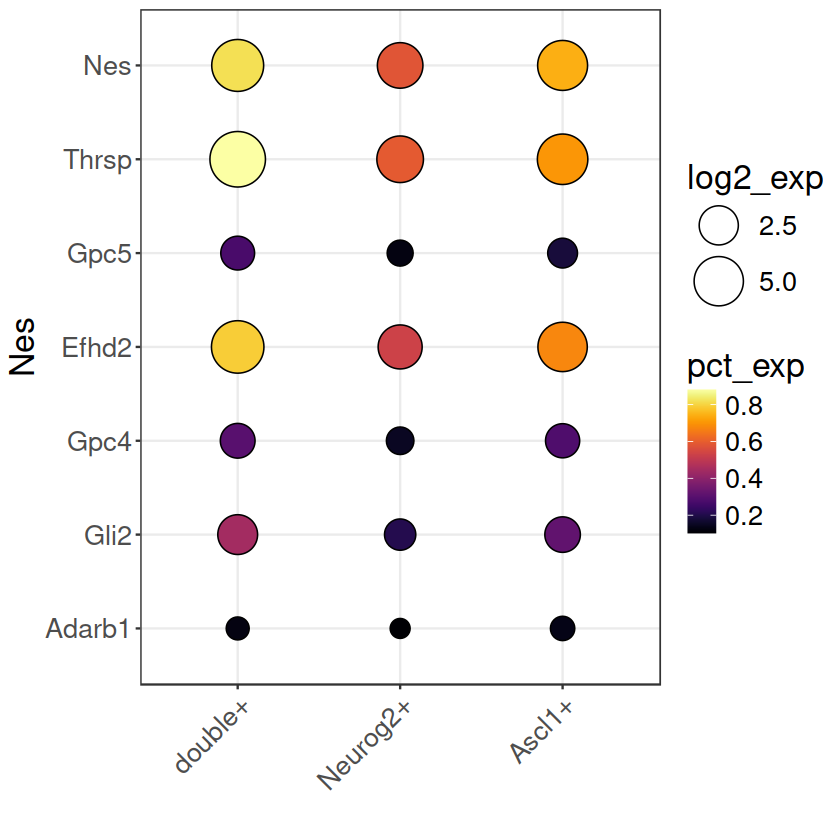

In [45]:
# png('aa-geneset-exp-pct.png', width = 5, height = 6, res = 300, units = 'in')
ggplot(plotdf2, aes(x = ctype, y = gene, label = round(pct_exp*100)/100)) +  
geom_point(shape = 21, color = 'black', aes(fill = pct_exp, size = log2_exp)) + theme_bw() + 
# geom_text(size = 6, hjust = -0.25, vjust = -2) + 
theme(text = element_text(size = 20), axis.text.x = element_text(angle = 45, hjust = 1)) +
xlab('') + ylab(currgene) + scale_fill_viridis(option = 'B') +
scale_size_continuous(breaks = c(0, 2.5, 5, 7.5, 10, 12.5, 15), range = c(5, 15)) 
# dev.off()